In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
import csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv('~/Desktop/TSLA.csv',error_bad_lines=False)
print("Number of rows and columns:", df.shape)
df.head(5)

In [114]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [115]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [116]:
print(X_train.shape)

(740, 60, 1)


In [117]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 57ms/step - loss: 0.0862
Epoch 2/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0162
Epoch 3/100
24/24 [==============================] - 1s 51ms/step - loss: 0.0115
Epoch 4/100
24/24 [==============================] - 1s 51ms/step - loss: 0.0131
Epoch 5/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0121
Epoch 6/100
24/24 [==============================] - 1s 51ms/step - loss: 0.0111
Epoch 7/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0116
Epoch 8/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0115
Epoch 9/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0102
Epoch 10/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0094
Epoch 11/100
24/24 [==============================] - 1s 55ms/step - loss: 0.0103
Epoch 12/100
24/24 [==============================] - 1s 54ms/step - loss: 0.0111
Epoch 13/100
24/24 [=====

In [118]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 60, 1)


In [119]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

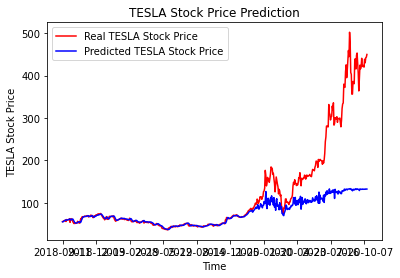

In [120]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,542,58))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [101]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv('~/Desktop/TSLA.csv',error_bad_lines=False)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [102]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [42]:
print(X_train.shape)

(740, 60, 1)


In [50]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [51]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

In [52]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

In [53]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0508
Epoch 2/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0172
Epoch 3/100
24/24 [==============================] - 1s 60ms/step - loss: 0.0198
Epoch 4/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0128
Epoch 5/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0119
Epoch 6/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0138
Epoch 7/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0104
Epoch 8/100
24/24 [==============================] - 2s 67ms/step - loss: 0.0107
Epoch 9/100
24/24 [==============================] - 2s 66ms/step - loss: 0.0100
Epoch 10/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0092
Epoch 11/100
24/24 [==============================] - 2s 71ms/step - loss: 0.0100
Epoch 12/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0124
Epoch 13/100
24/24 [=====

In [57]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 60, 1)


In [58]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [59]:
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

In [60]:
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

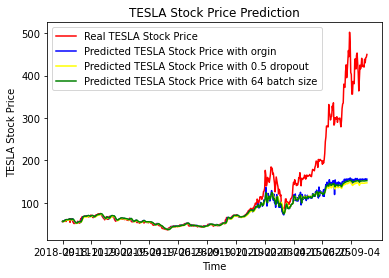

In [62]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'yellow', label = 'Predicted TESLA Stock Price with 0.5 dropout')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'green', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [63]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv('~/Desktop/TSLA.csv',error_bad_lines=False)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [64]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [65]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [66]:
print(X_train.shape)

(740, 60, 1)


In [67]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [78]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))
# Adding the output layer
model1.add(Dense(units = 1))

In [79]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [80]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 1s 62ms/step - loss: 0.0034
Epoch 2/100
24/24 [==============================] - 1s 59ms/step - loss: 0.0030
Epoch 3/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0026
Epoch 4/100
24/24 [==============================] - 1s 61ms/step - loss: 0.0032
Epoch 5/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0030
Epoch 6/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0031
Epoch 7/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0028
Epoch 8/100
24/24 [==============================] - 2s 70ms/step - loss: 0.0028
Epoch 9/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0026
Epoch 10/100
24/24 [==============================] - 2s 64ms/step - loss: 0.0028
Epoch 11/100
24/24 [==============================] - 2s 65ms/step - loss: 0.0024
Epoch 12/100
24/24 [==============================] - 2s 68ms/step - loss: 0.0027
Epoch 13/100
24/24 [=====

In [81]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 60, 1)


In [82]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [83]:
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)

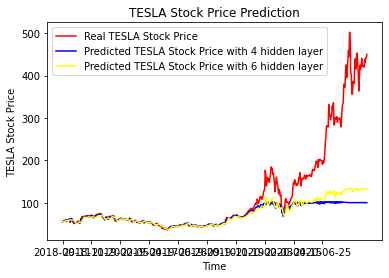

In [84]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 hidden layer')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'yellow', label = 'Predicted TESLA Stock Price with 6 hidden layer')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [122]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df = pd.read_csv('~/Desktop/TSLA.csv',error_bad_lines=False)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [123]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [124]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [125]:
print(X_train.shape)

(106, 60, 1)


In [126]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [127]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [128]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 48ms/step - loss: 0.2655
Epoch 2/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0516
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0366
Epoch 4/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0445
Epoch 5/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0300
Epoch 6/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0267
Epoch 7/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0261
Epoch 8/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0176
Epoch 9/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0187
Epoch 10/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0156
Epoch 11/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0131
Epoch 12/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0109
Epoch 13/100
4/4 [==============================]

In [129]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(528, 60, 1)


In [130]:
#predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [131]:
import copy
X_test2 = copy.deepcopy(X_test)
for i in range(14):
    X_temp = np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]= X_test[-1][j+1][0]
    X_temp[0][59][0] = model.predict(X_test2[-1:])[0][0]
    X_test2 = np.vstack([X_test2,X_temp])

predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(542, 1)

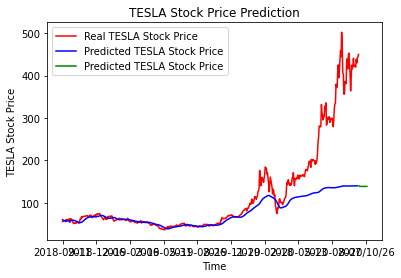

In [132]:
# Visualising the results
c = ["2020/10/14","2020/10/15","2020/10/16","2020/10/17","2020/10/18","2020/10/19","2020/10/20","2020/10/21","2020/10/22","2020/10/23","2020/10/24","2020/10/25","2020/10/26","2020/10/27","2020/10/28"]
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:1325, 'Date'],predicted_stock_price[1:527], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.plot(c,predicted_stock_price[527:], color = 'green', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,542,60))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()